In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_200_T_250',
                          'ng_refs_4__2__2',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.7_all.7__all.5',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_200_T_250',
                          'ng_refs_4__2__2',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.7_all.7__all.5',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [13]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [14]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [15]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [16]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [17]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

ng = 8

nref = 3

p_refs = (/ 1,  10, 200 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 4,   2,   2 /)

data wgt
     &     /2*.5, 6*.7/

planck_wgt_flux = 2

include 'mls75.pro'


In [18]:
fig.display_hrefanchor()

In [19]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [20]:
table_dgdgs.display_hrefanchor()

In [21]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [22]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [23]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

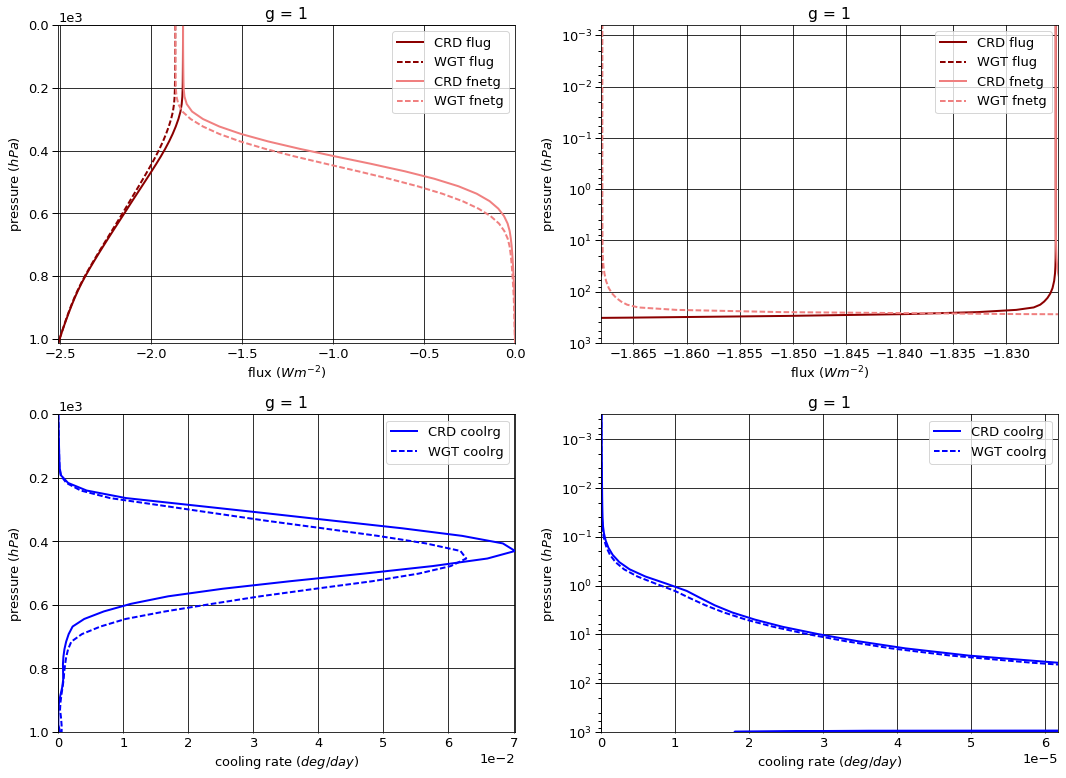

# Figure: flux, cooling rate g-group 2

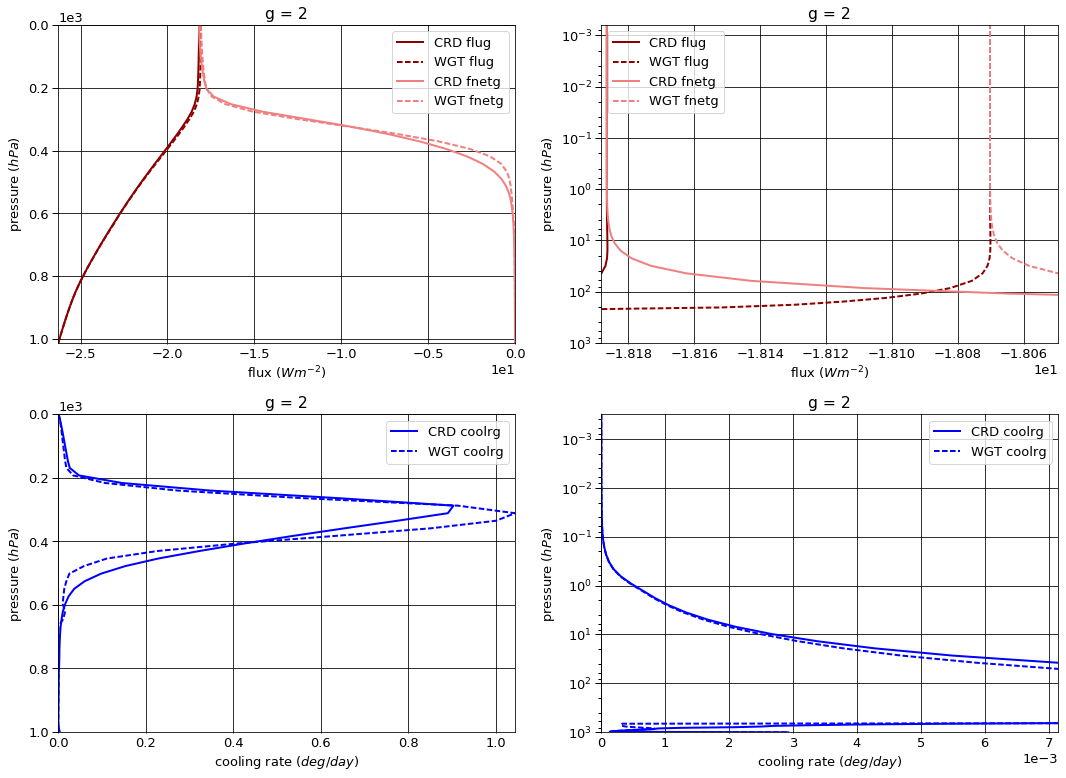

# Figure: flux, cooling rate g-group 3

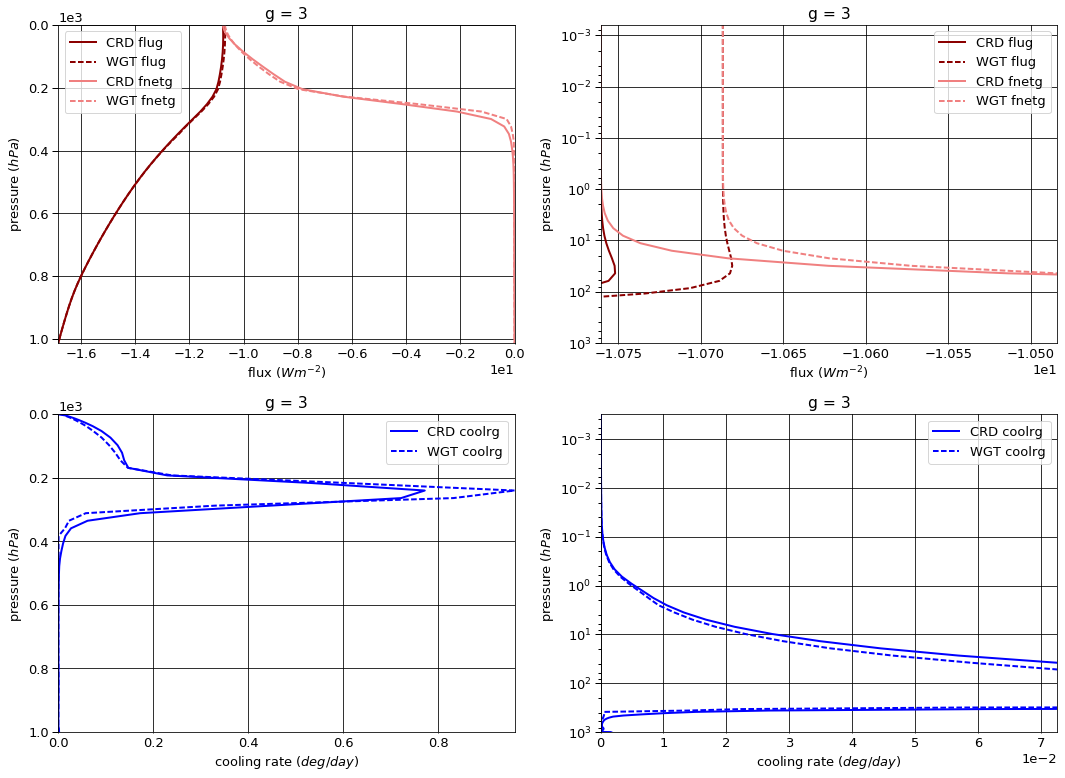

# Figure: flux, cooling rate g-group 4

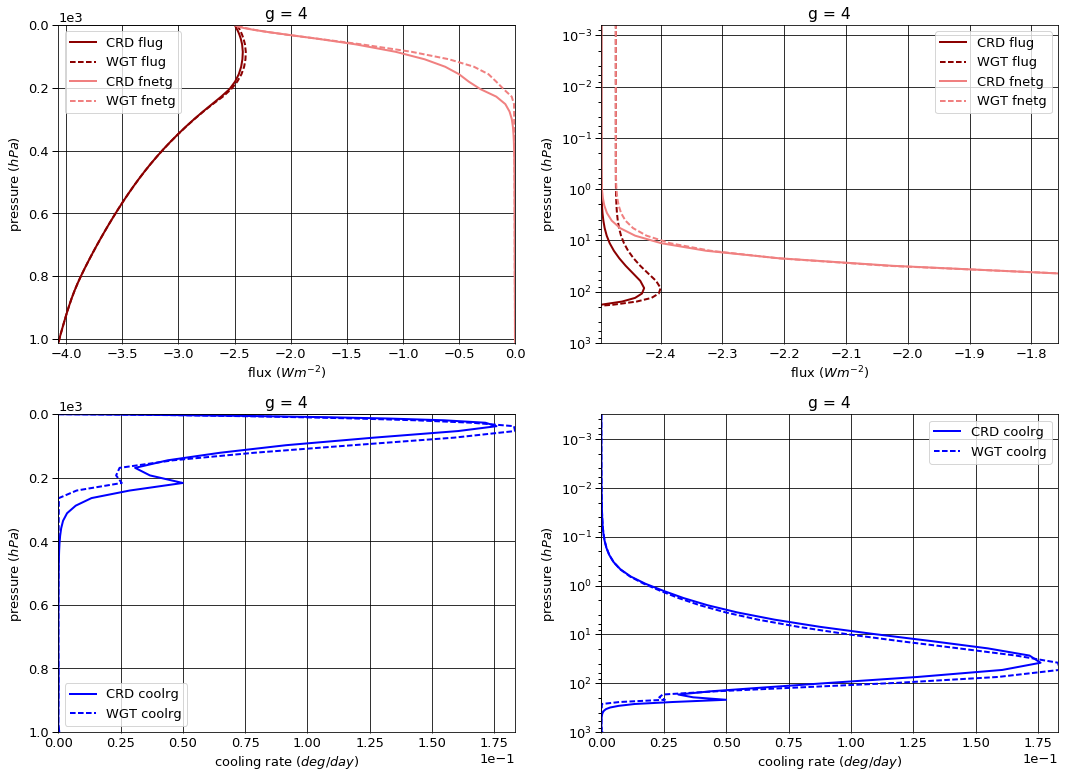

# Figure: flux, cooling rate g-group 5

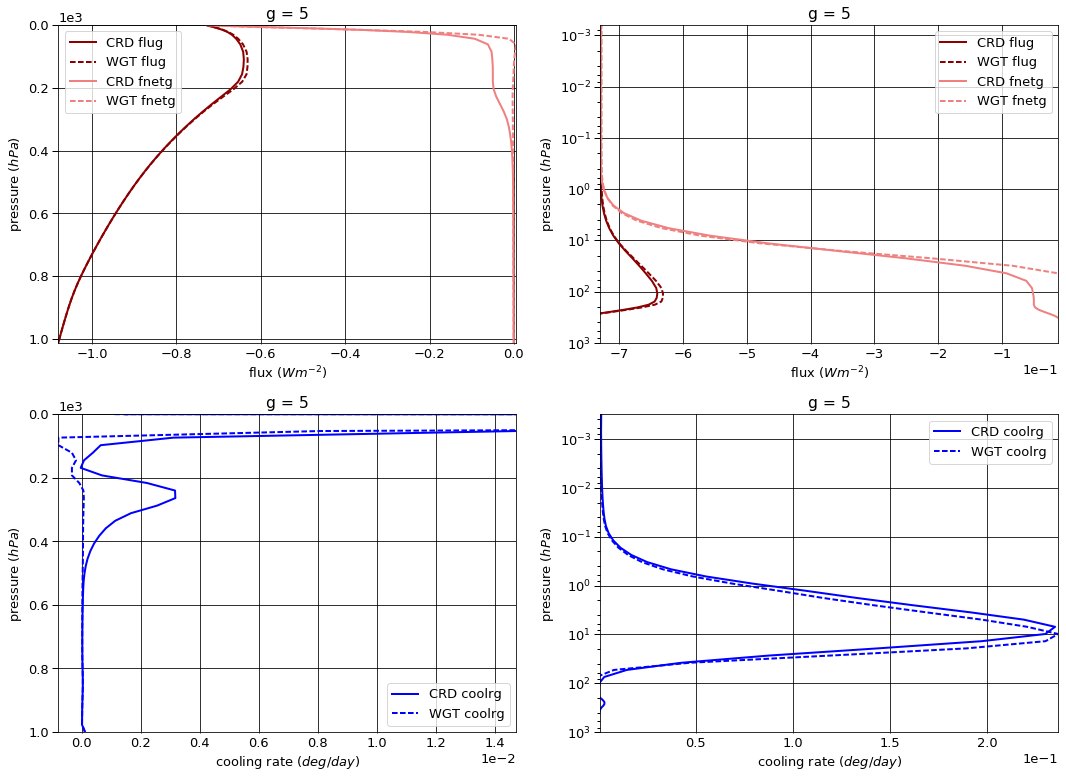

# Figure: flux, cooling rate g-group 6

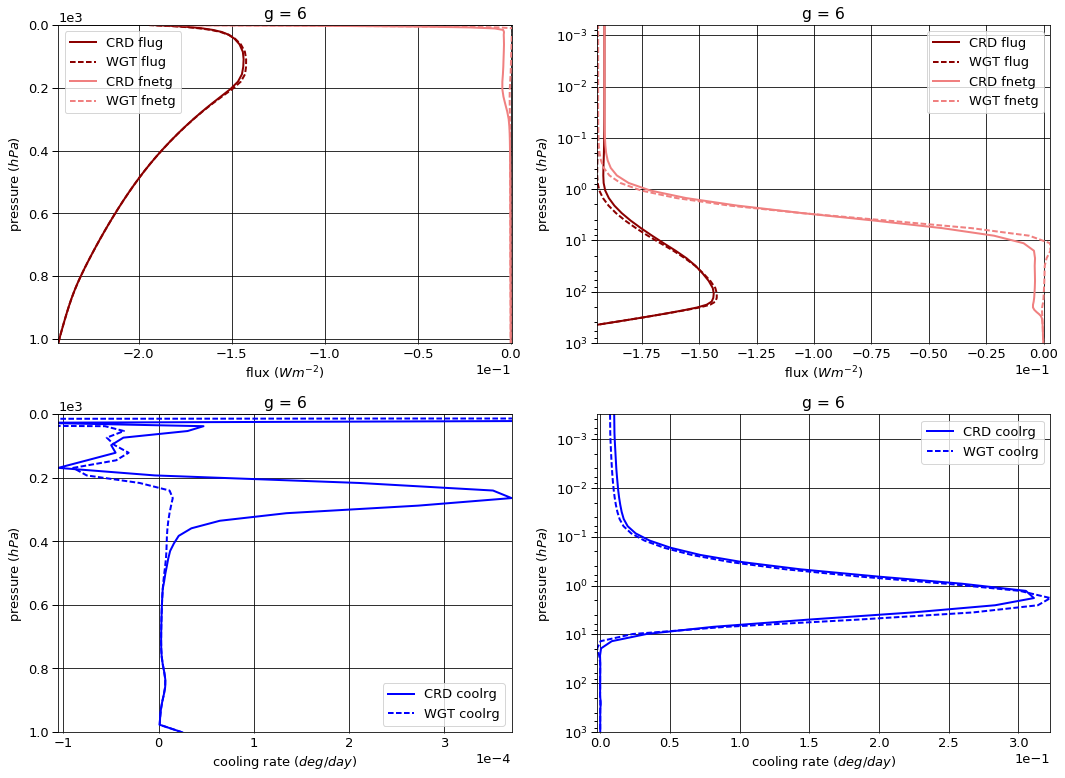

# Figure: flux, cooling rate g-group 7

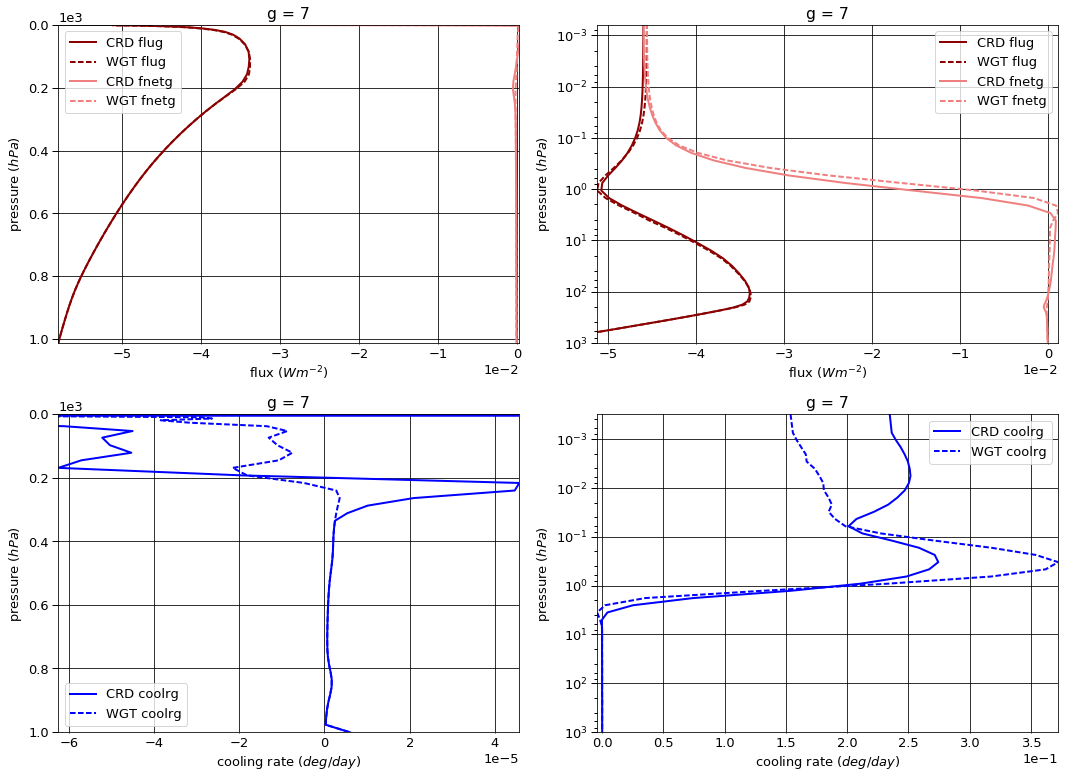

# Figure: flux, cooling rate g-group 8

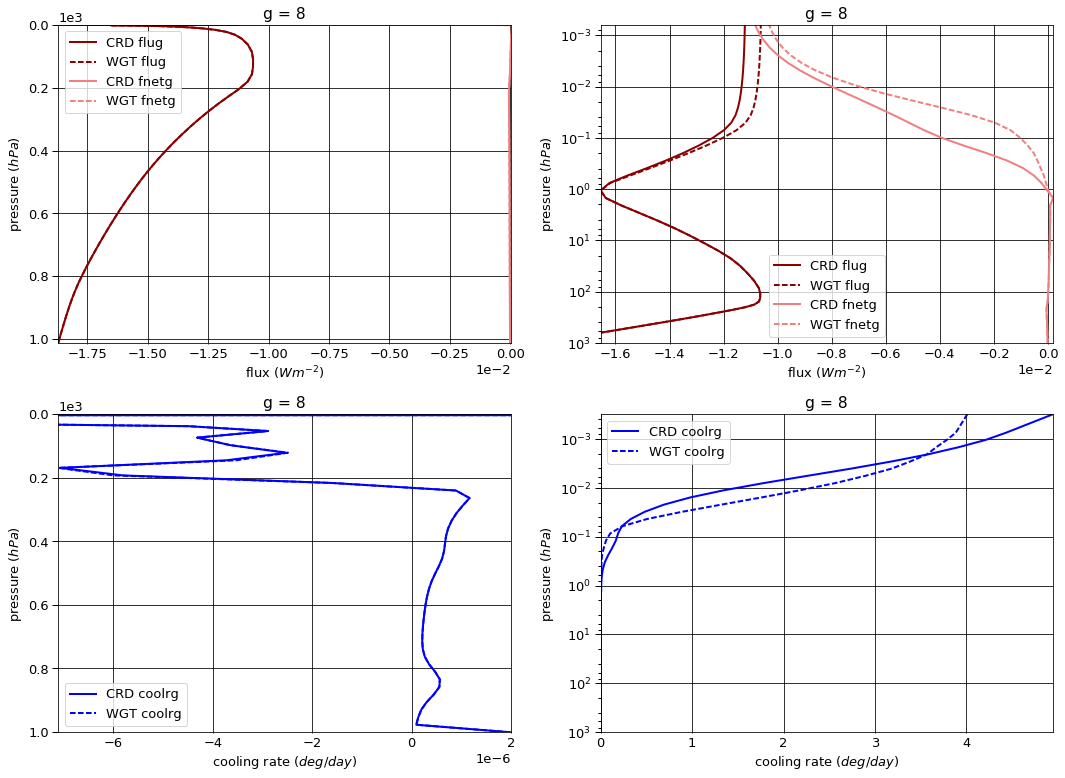

# Figure: flux, cooling rate g-group total

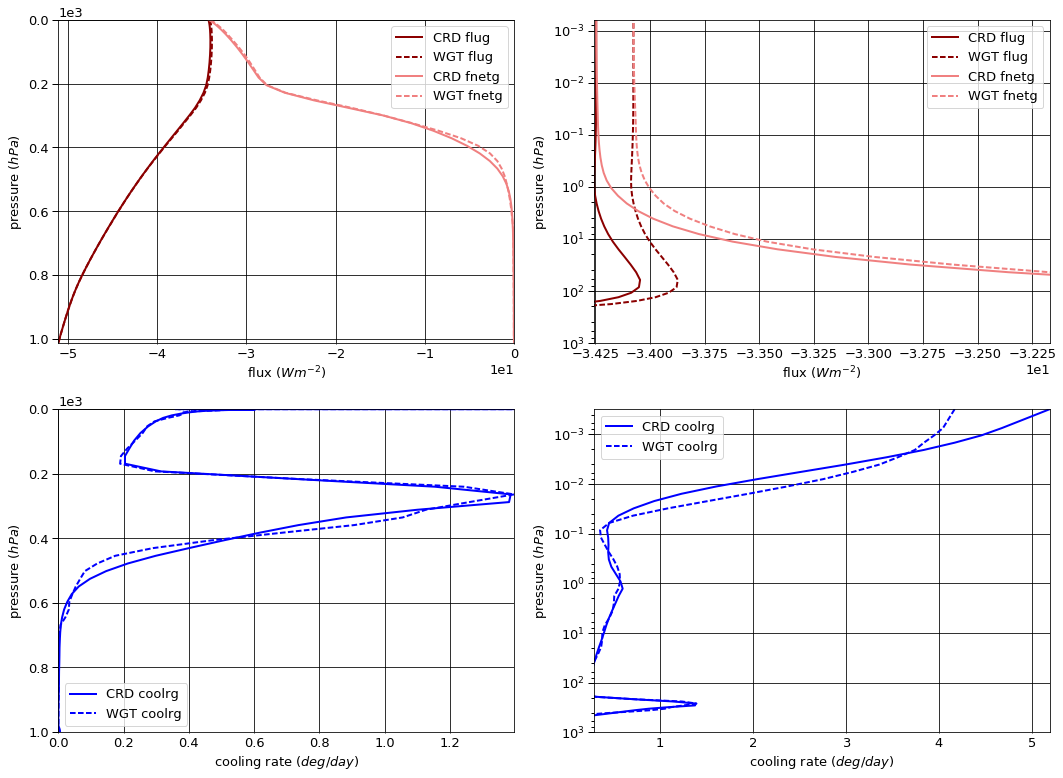

In [24]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [25]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -1.825357   0.000000  -1.825357
  1013.0   76     -2.510490   2.509608  -0.000883
2 0.0      1     -18.186521   0.000000 -18.186521
  1013.0   76    -26.277357  26.269271  -0.008086
3 0.0      1     -10.760592   0.000000 -10.760592
  1013.0   76    -16.832810  16.828056  -0.004754
4 0.0      1      -2.495734   0.000000  -2.495734
  1013.0   76     -4.069750   4.068607  -0.001143
5 0.0      1      -0.729463   0.000000  -0.729463
  1013.0   76     -1.080153   1.079848  -0.000305
6 0.0      1      -0.191227   0.000000  -0.191227
  1013.0   76     -0.243203   0.243135  -0.000069
7 0.0      1      -0.045986   0.000000  -0.045986
  1013.0   76     -0.058102   0.058086  -0.000017
8 0.0      1      -0.011201   0.000000  -0.011201
  1013.0   76     -0.018707   0.018702  -0.000006


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -1.867924   0.000000  -1.867924
  1013.0   76     -2.510490   2.509630  -0.000860
2 0.0      1     -18.070294   0.000000 -18.070294
  1013.0   76    -26.277357  26.269271  -0.008086
3 0.0      1     -10.686633   0.000000 -10.686633
  1013.0   76    -16.832810  16.828056  -0.004754
4 0.0      1      -2.472332   0.000000  -2.472332
  1013.0   76     -4.069750   4.068607  -0.001143
5 0.0      1      -0.728212   0.000000  -0.728212
  1013.0   76     -1.080153   1.079848  -0.000305
6 0.0      1      -0.194013   0.000000  -0.194013
  1013.0   76     -0.243203   0.243135  -0.000069
7 0.0      1      -0.045587   0.000000  -0.045587
  1013.0   76     -0.058102   0.058086  -0.000017
8 0.0      1      -0.010611   0.000000  -0.010611
  1013.0   76     -0.018707   0.018702  -0.000006


WGT - CRD


flug      fldg         fnetg
g pressure level                                  
1 0.0      1     -0.042567  0.000000 -4.256690e-02
  1013.0   76     0.000000  0.000022  2.246288e-05
2 0.0      1      0.116227  0.000000  1.162270e-01
  1013.0   76     0.000000  0.000000  2.015000e-07
3 0.0      1      0.073959  0.000000  7.395900e-02
  1013.0   76     0.000000  0.000000  1.096000e-07
4 0.0      1      0.023402  0.000000  2.340200e-02
  1013.0   76     0.000000  0.000000  4.500000e-09
5 0.0      1      0.001250  0.000000  1.250290e-03
  1013.0   76     0.000000  0.000000  0.000000e+00
6 0.0      1     -0.002786  0.000000 -2.785890e-03
  1013.0   76     0.000000  0.000000  0.000000e+00
7 0.0      1      0.000399  0.000000  3.992490e-04
  1013.0   76     0.000000  0.000000  0.000000e+00
8 0.0      1      0.000590  0.000000  5.903690e-04
  1013.0   76     0.000000  0.000000  0.000000e+00

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      1.020213e-07
  1001.112500 75     3.185343e-04
2 0.000312    1      1.433725e-06
  1001.112500 75     2.923691e-03
3 0.000312    1      6.220194e-05
  1001.112500 75     1.719285e-03
4 0.000312    1      2.999270e-05
  1001.112500 75     4.132126e-04
5 0.000312    1      1.541870e-03
  1001.112500 75     1.102566e-04
6 0.000312    1      1.002411e-02
  1001.112500 75     2.477510e-05
7 0.000312    1      2.347168e-01
  1001.112500 75     5.976432e-06
8 0.000312    1      4.948616e+00
  1001.112500 75     1.994245e-06


WGT


coolrg
g pressure    layer              
1 0.000312    1      5.978859e-08
  1001.112500 75     5.313123e-04
2 0.000312    1      1.418835e-06
  1001.112500 75     2.923601e-03
3 0.000312    1      5.311133e-05
  1001.112500 75     1.719241e-03
4 0.000312    1      3.106415e-05
  1001.112500 75     4.132108e-04
5 0.000312    1      1.105012e-03
  1001.112500 75     1.102546e-04
6 0.000312    1      7.059814e-03
  1001.112500 75     2.477510e-05
7 0.000312    1      1.537574e-01
  1001.112500 75     5.976432e-06
8 0.000312    1      4.009853e+00
  1001.112500 75     1.994245e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -4.223267e-08
  1001.112500 75     2.127780e-04
2 0.000312    1     -1.489010e-08
  1001.112500 75    -8.980000e-08
3 0.000312    1     -9.090604e-06
  1001.112500 75    -4.460000e-08
4 0.000312    1      1.071446e-06
  1001.112500 75    -1.820000e-09
5 0.000312    1     -4.368584e-04
  1001.112500 75    -2.010000e-09
6 0.000312    1     -2.964295e-03
  1001.112500 75     0.000000e+00
7 0.000312    1     -8.095931e-02
  1001.112500 75     0.000000e+00
8 0.000312    1     -9.387628e-01
  1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.246080,0.000000,-34.246080
1013.0,76,-51.090573,51.075312,-0.015261



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.075605,0.000000,-34.075605
1013.0,76,-51.090573,51.075335,-0.015238



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.170475,0.000000,0.170475
1013.0,76,0.000000,0.000022,0.000023


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.194992
1001.112500,75,0.005518



WGT


,,coolrg
pressure,layer,
0.000312,1,4.171861
1001.112500,75,0.005730



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-1.023131
1001.112500,75,0.000213


In [26]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.059091,0.046907
2,0.437864,0.509233
3,0.378258,0.334882
4,0.093652,0.081124
5,0.024152,0.021493
6,0.005364,0.004842
7,0.001242,0.001153
8,0.000379,0.000368


In [27]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.194698e-23
2,2.240636e-22
3,2.101537e-22
4,3.942711e-21
5,7.401100e-21
6,1.388730e-19
7,2.605789e-18
8,4.889459e-17


In [30]:
def spreadsheet():
    ng = 8
    ng_refs = [4, 2, 2]
    p_refs = [1, 10, 200]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [31]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.194698e-23,NaN,0.059091,0.046907,0.059091,0.046907,200.0
2,2.240636e-22,NaN,0.437864,0.509233,0.496955,0.556139,200.0
3,2.101537e-22,0.937920,0.378258,0.334882,0.875212,0.891021,10.0
4,3.942711e-21,18.761081,0.093652,0.081124,0.968864,0.972145,10.0
5,7.401100e-21,1.877160,0.024152,0.021493,0.993015,0.993638,1.0
6,1.388730e-19,18.763831,0.005364,0.004842,0.998379,0.998479,1.0
7,2.605789e-18,18.763830,0.001242,0.001153,0.999621,0.999632,1.0
8,4.889459e-17,18.763830,0.000379,0.000368,1.000000,1.000000,1.0


In [32]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

In [33]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')